In [1]:
import pandas as pd
import numpy as np # library to handle data in a vectorized manner

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.52         |     pyhd8ed1ab_0          35 KB  conda-forge
    geopy-2.2.0                |     pyhd8ed1ab_0          67 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         102 KB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.52-pyhd8ed1ab_0
  geopy              conda-forge/noarch::geopy-2.2.0-pyhd8ed1ab_0



geographiclib-1.52   | 35 KB     | ##################################### | 100% 
geopy-2.2.0          | 67 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transa

In [2]:
!pip install bs4
!pip install requests
import requests
!pip install pandas
import pandas as pd

     |████████████████████████████████| 122kB 15.3MB/s eta 0:00:01
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/a0/b0/b2/4f80b9456b87abedbc0bf2d52235414c3467d8889be38dd472
Successfully built bs4


### We will be exploring Toronto subway stations and all the venues closed to them to see which is the most suitable to buy a house or open a business 

In [3]:
TTC_data= pd.read_csv('TTC02.csv',header=0)

In [5]:
TTC_data.head()

,Latitude,Longitude,Station
0,43.638020,-79.536388,Kipling
1,43.645950,-79.523948,Islington
2,43.648804,-79.511541,Royal York
3,43.650576,-79.495225,Old Mill
4,43.650291,-79.484772,Jane


### With the help of Geocode we will be acquiring the coordinates of Toronto

In [6]:
address = 'Toronto,ON'

geolocator = Nominatim(user_agent="ttc_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


### Using folium a map of Toronto and all its subway (TTC) stations will be plotted

In [7]:
map_TOR = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, name in zip(TTC_data['Latitude'], TTC_data['Longitude'], TTC_data['Station']):
    label = '{}'.format(name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_TOR)  
    
map_TOR

### Let's set up all our Foursquare API details before we proceed. A limit of 100 venues will be used for this analysis

In [8]:
CLIENT_ID = 'TKEDN52IPD4BIMX4LBJMWMDIYSHFNTANJP1Q1JVHZ1R0UGLF' # your Foursquare ID
CLIENT_SECRET = 'UPMCB12OAF2EFFPMPVLW0HPY5K3OFRFLFG52LXHKLP32VQXC' # your Foursquare Secret
ACCESS_TOKEN = 'QC3N5UOQUBJY3J3LCEEARUE4F1YB4K04DSPFLSRHXHCJBJNK' 
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)
LIMIT=100

Your credentails:
CLIENT_ID: TKEDN52IPD4BIMX4LBJMWMDIYSHFNTANJP1Q1JVHZ1R0UGLF
CLIENT_SECRET:UPMCB12OAF2EFFPMPVLW0HPY5K3OFRFLFG52LXHKLP32VQXC


### All the details of neighborhood venues will be acquired with the help of a function and callbacks from Foursquare

In [9]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Station', 
                  'Station Latitude', 
                  'Station Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)
    
toronto_venues = getNearbyVenues(names=TTC_data['Station'],
                                   latitudes=TTC_data['Latitude'],
                                   longitudes=TTC_data['Longitude'])

Kipling
Islington
Royal York
Old Mill
Jane
Runnymede
High Park
Keele
Dundas West
Lansdowne
Dufferin
Ossington
Christie
Bathurst
Spadina
St George
Bay
Yonge
Sherbourne
Castle Frank
Broadview
Chester
Pape
Donlands
Greenwood
Coxwell
Woodbine
Main Street
Victoria Park
Warden
Kennedy
Downsview
Wilson
Yorkdale
Lawrence West
Glencairn
Eglinton West
St Clair West
Dupont
Spadina
St George
Museum
Queen's Park
St Patrick
Osgoode
St Andrew
Union
King
Queen
Dundas
College
Wellesley
Bloor
Rosedale
Summerhill
St Clair
Davisville
Eglinton
Lawrence
York Mills
Sheppard
North York Centre
Finch
Sheppard-Yonge
Bayview
Bessarion
Leslie
Don Mills
Kennedy
Lawrence East
Ellesmere
Midland
Scarborough Centre
McCowan


In [10]:
toronto_venues.groupby('Station').count()

,Station Latitude,Station Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Station,,,,,,
Bathurst,64,64,64,64,64,64
Bay,100,100,100,100,100,100
Bayview,33,33,33,33,33,33
Bessarion,13,13,13,13,13,13
Bloor,82,82,82,82,82,82
Broadview,49,49,49,49,49,49
Castle Frank,5,5,5,5,5,5
Chester,47,47,47,47,47,47
Christie,56,56,56,56,56,56


In [11]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 255 uniques categories.


### One hot coding is used to convert the venues to binary codes to indicate the presence of a venue within a vicnity

In [13]:
tor_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
tor_onehot['Station'] = toronto_venues['Station'] 

# move neighborhood column to the first column
fixed_columns = [tor_onehot.columns[-1]] + list(tor_onehot.columns[:-1])
tor_onehot = tor_onehot[fixed_columns]

tor_onehot.head()

,Station,Accessories Store,Adult Boutique,African Restaurant,American Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Basketball Stadium,Beer Bar,Beer Store,Bike Shop,Bistro,Bookstore,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Business Service,Butcher,Cafeteria,Café,Camera Store,Cantonese Restaurant,Caribbean Restaurant,Castle,Chinese Restaurant,Chiropractor,Chocolate Shop,Church,Churrascaria,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Rec Center,College Theater,Colombian Restaurant,Comedy Club,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Eastern European Restaurant,Electronics Store,Escape Room,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Financial or Legal Service,Fish & Chips Shop,Fish Market,Flower Shop,Food & Drink Shop,Food Court,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Health & Beauty Service,Health Food Store,High School,Historic Site,History Museum,Hobby Shop,Hockey Arena,Hookah Bar,Hostel,Hot Dog Joint,Hotel,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Lake,Latin American Restaurant,Leather Goods Store,Library,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Luggage Store,Market,Martial Arts School,Massage Studio,Mattress Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Movie Theater,Moving Target,Museum,Music School,Music Store,Music Venue,Nail Salon,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Other Great Outdoors,Outdoor Supply Store,Paper / Office Supplies Store,Park,Pastry Shop,Persian Restaurant,Pet Store,Pharmacy,Pie Shop,Pizza Place,Platform,Playground,Plaza,Poke Place,Pool,Pool Hall,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,Rock Climbing Spot,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,School,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Skating Rink,Smoke Shop,Smoothie Shop,Soccer Field,Social Club,South American Restaurant,Souvlaki Shop,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Sri Lankan Restaurant,Steakhouse,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Syrian Restaurant,Taco Place,Tailor Shop,Tanning Salon,Tapas Restaurant,Tea Room,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Tibetan Restaurant,Toy / Game Store,Trail,Train Station,Turkish Restaurant,Udon Restaurant,University,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,Kipling,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [14]:
tor_grouped = tor_onehot.groupby('Station').mean().reset_index()
tor_grouped

,Station,Accessories Store,Adult Boutique,African Restaurant,American Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Basketball Stadium,Beer Bar,Beer Store,Bike Shop,Bistro,Bookstore,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Business Service,Butcher,Cafeteria,Café,Camera Store,Cantonese Restaurant,Caribbean Restaurant,Castle,Chinese Restaurant,Chiropractor,Chocolate Shop,Church,Churrascaria,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Rec Center,College Theater,Colombian Restaurant,Comedy Club,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Eastern European Restaurant,Electronics Store,Escape Room,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Financial or Legal Service,Fish & Chips Shop,Fish Market,Flower Shop,Food & Drink Shop,Food Court,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Health & Beauty Service,Health Food Store,High School,Historic Site,History Museum,Hobby Shop,Hockey Arena,Hookah Bar,Hostel,Hot Dog Joint,Hotel,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Lake,Latin American Restaurant,Leather Goods Store,Library,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Luggage Store,Market,Martial Arts School,Massage Studio,Mattress Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Movie Theater,Moving Target,Museum,Music School,Music Store,Music Venue,Nail Salon,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Other Great Outdoors,Outdoor Supply Store,Paper / Office Supplies Store,Park,Pastry Shop,Persian Restaurant,Pet Store,Pharmacy,Pie Shop,Pizza Place,Platform,Playground,Plaza,Poke Place,Pool,Pool Hall,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,Rock Climbing Spot,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,School,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Skating Rink,Smoke Shop,Smoothie Shop,Soccer Field,Social Club,South American Restaurant,Souvlaki Shop,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Sri Lankan Restaurant,Steakhouse,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Syrian Restaurant,Taco Place,Tailor Shop,Tanning Salon,Tapas Restaurant,Tea Room,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Tibetan Restaurant,Toy / Game Store,Trail,Train Station,Turkish Restaurant,Udon Restaurant,University,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,Bathurst,0.000000,0.000000,0.000000,0.015625,0.000000,0.000000,0.015625,0.000000,0.000000,0.000000,0.000000,0.031250,0.000000,0.015625,0.000000,0.015625,0.000000,0.015625,0.000000,0.015625,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.031250,0.000000,0.000000,0.015625,0.000000,0.000000,0.000000,0.000000

### Let's run a trial and see if the top 5 locations are visible

In [15]:
num_top_venues = 5

for hood in tor_grouped['Station']:
    print("----"+hood+"----")
    temp = tor_grouped[tor_grouped['Station'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Bathurst----
                venue  freq
0   Korean Restaurant  0.17
1       Grocery Store  0.06
2  Mexican Restaurant  0.05
3         Coffee Shop  0.05
4      Ice Cream Shop  0.03


----Bay----
         venue  freq
0         Café  0.05
1  Coffee Shop  0.05
2     Boutique  0.05
3   Restaurant  0.04
4        Hotel  0.04


----Bayview----
         venue  freq
0  Coffee Shop  0.12
1         Café  0.09
2   Shoe Store  0.06
3          Gym  0.06
4          Spa  0.06


----Bessarion----
                  venue  freq
0                  Bank  0.15
1           Fish Market  0.08
2  Outdoor Supply Store  0.08
3          Burger Joint  0.08
4        Clothing Store  0.08


----Bloor----
                venue  freq
0                Café  0.06
1         Coffee Shop  0.06
2  Italian Restaurant  0.05
3   Indian Restaurant  0.04
4    Sushi Restaurant  0.04


----Broadview----
         venue  freq
0          Pub  0.08
1  Coffee Shop  0.04
2          Spa  0.04
3         Café  0.04
4   Restaurant  0.04



In [16]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

### Top 10 venues in and around each TTC station is listed

In [17]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Station']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
stations_venues_sorted = pd.DataFrame(columns=columns)
stations_venues_sorted['Station'] = tor_grouped['Station']

for ind in np.arange(tor_grouped.shape[0]):
    stations_venues_sorted.iloc[ind, 1:] = return_most_common_venues(tor_grouped.iloc[ind, :], num_top_venues)

stations_venues_sorted.head()

,Station,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bathurst,Korean Restaurant,Grocery Store,Coffee Shop,Mexican Restaurant,Bakery,Bubble Tea Shop,Eastern European Restaurant,Ice Cream Shop,Pastry Shop,Cosmetics Shop
1,Bay,Boutique,Café,Coffee Shop,Spa,Hotel,Restaurant,Italian Restaurant,Japanese Restaurant,Indian Restaurant,French Restaurant
2,Bayview,Coffee Shop,Café,Shoe Store,Clothing Store,Gym,Spa,Indian Restaurant,Gourmet Shop,Restaurant,Sporting Goods Shop
3,Bessarion,Bank,Pizza Place,Fast Food Restaurant,Clothing Store,Breakfast Spot,Gas Station,Fish Market,Burger Joint,Outdoor Supply Store,Sporting Goods Shop
4,Bloor,Café,Coffee Shop,Italian Restaurant,Yoga Studio,Sushi Restaurant,French Restaurant,Hotel,Indian Restaurant,Japanese Restaurant,Boutique


### K-means clustering is set up, to allocate each location to a cluster

In [18]:
kclusters = 5

tor_grouped_clustering = tor_grouped.drop('Station', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(tor_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 1, 0, 0, 1, 1, 2, 1, 1, 0], dtype=int32)

In [19]:
stations_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

tor_merged = TTC_data

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
tor_merged = tor_merged.join(stations_venues_sorted.set_index('Station'), on='Station')
tor_merged.head()

,Latitude,Longitude,Station,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,43.638020,-79.536388,Kipling,0,Coffee Shop,Cosmetics Shop,Grocery Store,Bank,Sandwich Place,Fried Chicken Joint,Fast Food Restaurant,Burger Joint,Restaurant,Sushi Restaurant
1,43.645950,-79.523948,Islington,0,Coffee Shop,Pub,Sandwich Place,Fast Food Restaurant,Bakery,Flower Shop,Restaurant,Thai Restaurant,Beer Store,Grocery Store
2,43.648804,-79.511541,Royal York,1,Coffee Shop,Breakfast Spot,Bank,Italian Restaurant,Pub,Dessert Shop,Sushi Restaurant,Bakery,Burger Joint,Sporting Goods Shop
3,43.650576,-79.495225,Old Mill,2,Park,Event Space,American Restaurant,Metro Station,Spa,Discount Store,Distribution Center,Fried Chicken Joint,French Restaurant,Fountain
4,43.650291,-79.484772,Jane,1,Café,Coffee Shop,Pizza Place,Sushi Restaurant,Pub,Yoga Studio,French Restaurant,Latin American Restaurant,Burrito Place,Smoothie Shop


### Yet another folium map is created to show the clusters

In [20]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(tor_merged['Latitude'], tor_merged['Longitude'], tor_merged['Station'], tor_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [21]:
tor_merged['Cluster Labels'] = tor_merged['Cluster Labels'].astype(int)

### What are the most common venues around our TTC stations- lets check

In [22]:
top_venue_sum = tor_merged
top_venue_sum = top_venue_sum.drop(['Latitude','Longitude','Station'], axis=1)
top_venue_sum = top_venue_sum.groupby(['Cluster Labels', '1st Most Common Venue']).size().reset_index(name='Count')
top_venue_sum

,Cluster Labels,1st Most Common Venue,Count
0,0,Bank,1
1,0,Clothing Store,4
2,0,Coffee Shop,20
3,0,Fast Food Restaurant,2
4,0,Furniture / Home Store,2
5,0,Middle Eastern Restaurant,1
6,1,Bar,1
7,1,Boutique,1
8,1,Bus Station,1
9,1,Café,11


In [23]:
cluster_venue = top_venue_sum.pivot(index='Cluster Labels', columns='1st Most Common Venue', values='Count')
# change NaN values to 0
cluster_venue = cluster_venue.fillna(0).astype(int).reset_index(drop=True)
cluster_venue

1st Most Common Venue,Bank,Bar,Boutique,Bus Line,Bus Station,Café,Caribbean Restaurant,Clothing Store,Coffee Shop,Fast Food Restaurant,Furniture / Home Store,Greek Restaurant,Gym,Italian Restaurant,Korean Restaurant,Middle Eastern Restaurant,Park,Pharmacy,Pizza Place,Pub,Ramen Restaurant,Sandwich Place
0,1,0,0,0,0,0,0,4,20,2,2,0,0,0,0,1,0,0,0,0,0,0
1,0,1,1,0,1,11,1,0,9,0,0,2,1,3,3,0,0,1,2,1,1,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4')])

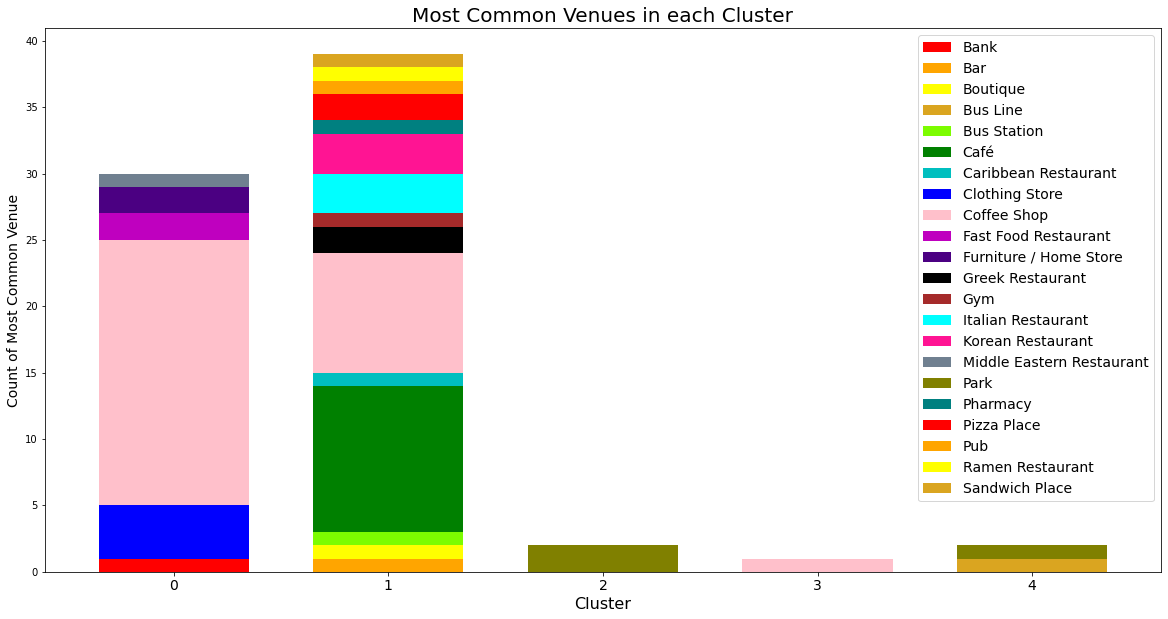

In [24]:
import matplotlib.pyplot as plt
my_colors = ['r','orange','yellow','goldenrod','lawngreen','g','c','b','pink','m','indigo','k','brown','cyan','deeppink','slategrey','olive','teal']
cv_plot = cluster_venue.plot(kind='bar', stacked=True,
                            figsize=(20,10), color=my_colors,
                            width=0.7)
plt.title("Most Common Venues in each Cluster", fontsize=20)
plt.xlabel("Cluster", fontsize=16)
plt.ylabel("Count of Most Common Venue", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1),labels=cluster_venue.columns, fontsize=14)
plt.xticks(rotation=0, fontsize=14)

In [25]:
tor_merged.loc[tor_merged['Cluster Labels'] == 0, tor_merged.columns[[2] + list(range(3, tor_merged.shape[1]))]]

,Station,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Kipling,0,Coffee Shop,Cosmetics Shop,Grocery Store,Bank,Sandwich Place,Fried Chicken Joint,Fast Food Restaurant,Burger Joint,Restaurant,Sushi Restaurant
1,Islington,0,Coffee Shop,Pub,Sandwich Place,Fast Food Restaurant,Bakery,Flower Shop,Restaurant,Thai Restaurant,Beer Store,Grocery Store
15,St George,0,Coffee Shop,Restaurant,Gym,Café,Pub,Clothing Store,Italian Restaurant,Boutique,Museum,Grocery Store
18,Sherbourne,0,Coffee Shop,Grocery Store,Sandwich Place,Office,Café,Library,Breakfast Spot,Pub,Filipino Restaurant,Bistro
30,Kennedy,0,Coffee Shop,Convenience Store,Chinese Restaurant,Train Station,Bus Station,Sandwich Place,Grocery Store,Bank,Bus Line,Light Rail Station
32,Wilson,0,Fast Food Restaurant,Modern European Restaurant,Sandwich Place,Beer Store,Liquor Store,Gym / Fitness Center,Coffee Shop,Metro Station,Arts & Crafts Store,Men's Store
33,Yorkdale,0,Clothing Store,Toy / Game Store,Women's Store,Coffee Shop,Accessories Store,Shoe Store,Sandwich Place,Movie Theater,Jewelry Store,Food Court
34,Lawrence West,0,Fast Food Restaurant,Coffee Shop,Gas Station,Restaurant,Grocery Store,Pet Store,Gym,Falafel Restaurant,Farmers Market,Filipino Restaurant
40,St George,0,Coffee Shop,Restaurant,Gym,Café,Pub,Clothing Store,Italian Restaurant,Boutique,Museum,Grocery Store
42,Queen's Park,0,Coffee Shop,Café,Sandwich Place,Restaurant,Italian Restaurant,French Restaurant,Japanese Restaurant,Thai Restaurant,Bubble Tea Shop,Bank


In [26]:
tor_merged.loc[tor_merged['Cluster Labels'] == 1, tor_merged.columns[[2] + list(range(3, tor_merged.shape[1]))]]

,Station,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Royal York,1,Coffee Shop,Breakfast Spot,Bank,Italian Restaurant,Pub,Dessert Shop,Sushi Restaurant,Bakery,Burger Joint,Sporting Goods Shop
4,Jane,1,Café,Coffee Shop,Pizza Place,Sushi Restaurant,Pub,Yoga Studio,French Restaurant,Latin American Restaurant,Burrito Place,Smoothie Shop
5,Runnymede,1,Coffee Shop,Café,Bakery,Bank,Pizza Place,Indian Restaurant,Gastropub,Flower Shop,Pub,Latin American Restaurant
6,High Park,1,Pizza Place,Mexican Restaurant,Pet Store,Gas Station,Bar,Pub,Gym / Fitness Center,Breakfast Spot,Convenience Store,School
7,Keele,1,Pizza Place,Convenience Store,Bar,Sushi Restaurant,Thai Restaurant,Pet Store,Playground,Pub,Coffee Shop,Sandwich Place
8,Dundas West,1,Coffee Shop,Pub,Pizza Place,Bar,Grocery Store,Café,Mediterranean Restaurant,Breakfast Spot,Sports Bar,Sporting Goods Shop
9,Lansdowne,1,Café,Bar,Sandwich Place,Caribbean Restaurant,Cocktail Bar,Bakery,Other Great Outdoors,Diner,Brewery,Portuguese Restaurant
10,Dufferin,1,Bar,Bakery,Sandwich Place,Park,Beer Store,Coffee Shop,Cocktail Bar,Restaurant,Mexican Restaurant,Vietnamese Restaurant
11,Ossington,1,Café,Pub,Cocktail Bar,Bakery,Pizza Place,Ethiopian Restaurant,Comedy Club,Middle Eastern Restaurant,Bar,Indian Restaurant
12,Christie,1,Korean Restaurant,Grocery Store,Indian Restaurant,Cocktail Bar,Coffee Shop,Pub,Bubble Tea Shop,Mexican Restaurant,Dessert Shop,Gift Shop


In [27]:
tor_merged.loc[tor_merged['Cluster Labels'] == 2, tor_merged.columns[[2] + list(range(3, tor_merged.shape[1]))]]

,Station,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Old Mill,2,Park,Event Space,American Restaurant,Metro Station,Spa,Discount Store,Distribution Center,Fried Chicken Joint,French Restaurant,Fountain
19,Castle Frank,2,Park,Metro Station,Convenience Store,Trail,Yoga Studio,Flower Shop,Filipino Restaurant,Financial or Legal Service,Fish & Chips Shop,Fish Market


In [28]:
tor_merged.loc[tor_merged['Cluster Labels'] == 3, tor_merged.columns[[2] + list(range(3, tor_merged.shape[1]))]]

,Station,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
71,Midland,3,Coffee Shop,Japanese Restaurant,Noodle House,Pizza Place,Middle Eastern Restaurant,Sporting Goods Shop,Food Truck,Food Stand,Food Court,Food & Drink Shop


In [29]:
tor_merged.loc[tor_merged['Cluster Labels'] == 4, tor_merged.columns[[2] + list(range(3, tor_merged.shape[1]))]]

,Station,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
29,Warden,4,Bus Line,Bakery,Bus Station,Intersection,Park,Food & Drink Shop,Financial or Legal Service,Fish & Chips Shop,Fish Market,Flower Shop
35,Glencairn,4,Park,Pizza Place,Playground,Japanese Restaurant,Bakery,Fish Market,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Financial or Legal Service
